# Sentiment analysis

## Problem Statement

Naive Bayes models are very useful when we want to analyze sentiment, classify texts into topics or</br>
recommendations, as the characteristics of these challenges meet the theoretical and methodological</br>
assumptions of the model very well.

In this project you will practice with a dataset to create a review classifier for the Google Play store.

## Dictionary

**package_name.** Name of the mobile application (categorical) </br>
**review.** Comment about the mobile application (categorical) </br>
**polarity.** Class variable (0 or 1), being 0 a negative comment and 1, positive (numeric). </br>

In [21]:
# Importings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score
from pickle import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

df.to_csv('../data/raw/playstore_reviews_raw.csv')

df.sample(10)

,package_name,review,polarity
329,com.viber.voip,can't open after update the app crashes and d...,0
613,com.evernote,nice app i suggest you to add a word-count fe...,1
519,com.dropbox.android,sort option not working they have just provid...,0
150,com.king.candycrushsaga,developers please read. i think there needs t...,0
26,com.facebook.katana,not supported my phon galaxy core i have been...,0
395,com.google.android.talk,notification problems hangouts doesn't keep u...,0
187,com.imangi.templerun2,good game but... i have always liked temple r...,0
390,com.google.android.talk,mic on speaker is not working with oneplusx w...,0
421,com.facebook.orca,messages are not sending or receiving right a...,0
388,com.google.android.talk,mms failure still have issues with group mess...,0


In [3]:
# Preprocessing

df_processed = df.drop('package_name', axis=1).copy()

df_processed.sample(10, random_state=1010)

,review,polarity
724,i want the old theme back!!!!! this theme is ...,0
205,decembers update this recent december 2015 up...,0
585,edit: wakelock has been fixed. thanks! ...,1
377,some issues i love this app but i have been h...,0
153,complete bull was on 1186 and went to play an...,0
816,hamro keyboar needs update n new emojis thnkz...,1
21,"keeps updating updates all the time, slows my...",0
699,cant download big things i cant download 15+ ...,0
802,another update and still crashing. previously...,0
3,the new features suck for those of us who don...,0


In [4]:
df_processed["review"] = df_processed["review"].str.strip().str.lower()

df_processed.sample(10, random_state=1010)

,review,polarity
724,i want the old theme back!!!!! this theme is a...,0
205,decembers update this recent december 2015 upd...,0
585,edit: wakelock has been fixed. thanks! i ...,1
377,some issues i love this app but i have been ha...,0
153,complete bull was on 1186 and went to play and...,0
816,hamro keyboar needs update n new emojis thnkz ...,1
21,"keeps updating updates all the time, slows my ...",0
699,cant download big things i cant download 15+ m...,0
802,another update and still crashing. previously ...,0
3,the new features suck for those of us who don'...,0


In [5]:
X = df_processed['review'].copy()
y = df_processed['polarity'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1010)

X_train.sample(10, random_state=1010)

643    pics are not loaded i  love using uc browser b...
748    boo! it loads slow even on my hardware. consid...
443    few ui updates 1. group should be included wit...
57     why is there so much space? there is so much w...
665    hamro keyboard it is fantastic app for mobile ...
412    causes android device to not register touch th...
811    the best android browser fast, well designed, ...
870    kinda like a 2d kingdom havoc fun!  if kingdom...
808    almost good enough i have tried lots of androi...
688    best app i have seen so far..... ŕ¤šŕ¤žŕ¤žŕľŕ...
Name: review, dtype: object

In [6]:
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

In [7]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [9]:
accuracy_score(y_test, y_pred)

0.8379888268156425

In [10]:
dump(model, open("../models/naive_bayes_default.sav", "wb"))

In [12]:
# Testing out Multinomial NB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

In [14]:
accuracy_score(y_test, y_pred)

0.8435754189944135

Despite being a problem with a binomial solution, a higher degree of accuracy is achieved </br>
when solving the problem with Multinomial NB compared to Bernoulli NB, by 0.56%.

In [15]:
# Testing out Gaussian NB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

In [17]:
accuracy_score(y_test, y_pred)

0.7877094972067039

The Gaussian NB method demonstrates a more predictable accuracy compared to </br>
Bernoulli NB, being lower by 5.03%.

In [20]:
# Random Forest Comparison

model = RandomForestClassifier(random_state = 1010)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1010)

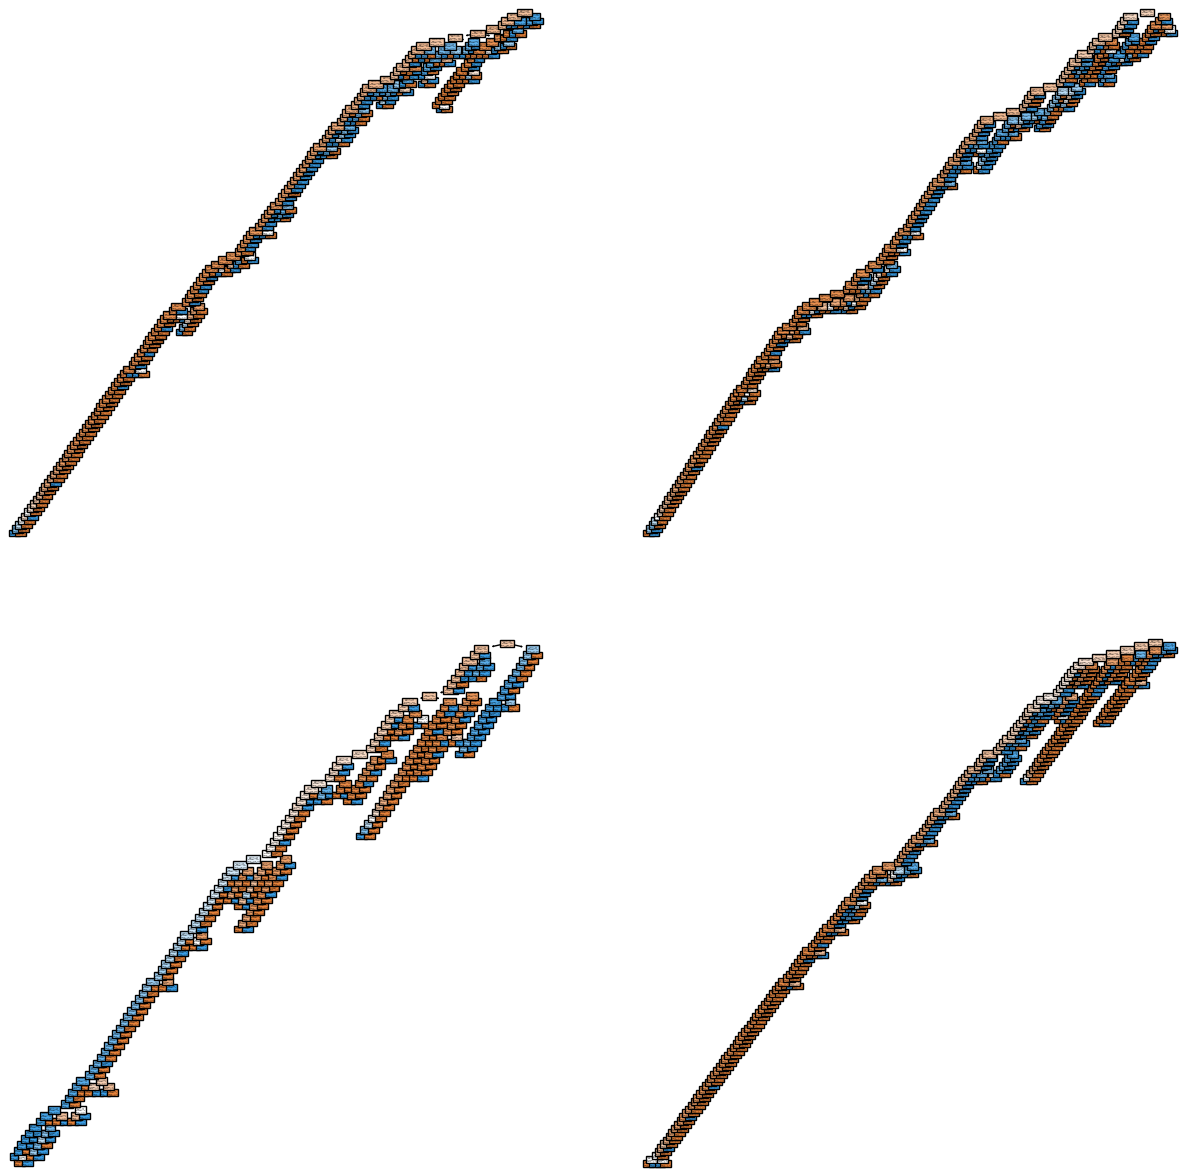

In [25]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

X_train_df = pd.DataFrame(X_train)

feature_names = list(X_train_df.columns)
class_names = ["0", "1"]

tree.plot_tree(model.estimators_[0], ax=axis[0, 0], feature_names=feature_names, class_names=class_names, filled=True)
tree.plot_tree(model.estimators_[1], ax=axis[0, 1], feature_names=feature_names, class_names=class_names, filled=True)
tree.plot_tree(model.estimators_[2], ax=axis[1, 0], feature_names=feature_names, class_names=class_names, filled=True)
tree.plot_tree(model.estimators_[3], ax=axis[1, 1], feature_names=feature_names, class_names=class_names, filled=True)

plt.show()

In [27]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0])

In [28]:
accuracy_score(y_test, y_pred)

0.8100558659217877

A lower accuracy is obtained by Random Forest compared to Bernoulli NB by 2.79%.

In [ ]:
dump(model, open("../models/random_forest_default.sav", "wb"))